In [15]:
# We need some libraries
import os.path
import json

import requests
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/Users/baart_f/.virtualenvs/py3/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [34]:
# Given an image with people that we want to blur out
url = 'http://argus-public.deltares.nl/sites/zandmotor/2015/c4/264_Sep.21/1442842204.Mon.Sep.21_13_30_04.UTC.2015.zandmotor.c4.snap.jpg'

In [3]:
# lookup credentials
auth = json.load(open(os.path.expanduser('~/zandmotor.json')))
# get the image from the server
resp = requests.get(url, auth=tuple(auth))

In [4]:
# these are the bytes, maybe accessing as a file object is easier
imgbytes = resp.content

In [17]:
# this is a bit of hack
img_bgr = cv2.imdecode(np.asarray(list(imgbytes), dtype='uint8'), cv2.IMREAD_COLOR)
# opencv assumes bgr by default 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

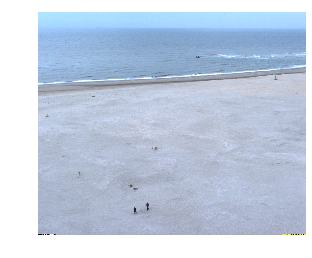

In [36]:
# Show the image, there should be two people walking at the bottom
plt.imshow(img_rgb)
_ = plt.axis('off')

In [20]:
# now for some magic hog detection....
hog = cv2.HOGDescriptor()

# Detect people in static images
# based on http://lear.inrialpes.fr/people/triggs/pubs/Dalal-cvpr05.pdf
peopledetector = cv2.HOGDescriptor_getDefaultPeopleDetector()

# Set the dector
hog.setSVMDetector( peopledetector )
# http://i1.theportalwiki.net/img/2/2a/Turret_turret_autosearch_4.wav
found, weights = hog.detectMultiScale(img,  winStride=(8,8), padding=(32,32), scale=1.01)
# should be able to find the people, if they have enough pixels and are in upright position....
found

array([[ 966, 1704,   72,  145],
       [ 847, 1724,   78,  156]], dtype=int32)

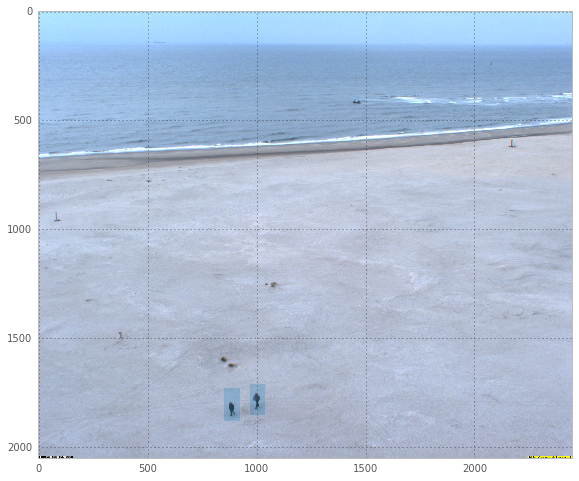

In [22]:
# open and play: http://i1.theportalwiki.net/img/5/58/Turret_turret_active_7.wav
fig, ax = plt.subplots(figsize=(13,8))
ax.imshow(img_rgb)
for rect in found:
    x,y, w, h = rect
    r = plt.Rectangle([x,y],w,h, alpha=0.3)
    ax.add_patch(r)

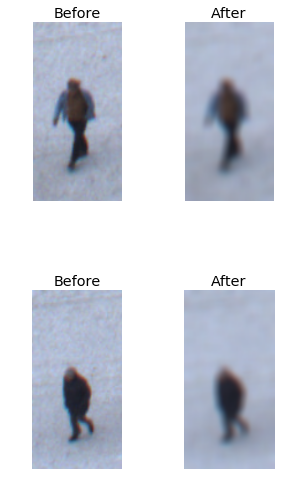

In [43]:
# apply blurring
img_rgb_new = img_rgb.copy()
# show before and after 
fig, axes = plt.subplots(len(found), 2, figsize=(5, 8))
for rect, ax in zip(found, axes):
    x,y, w, h = rect
    person = img_rgb[y:y+h, x:x+w]
    person_new = cv2.blur(person, (8, 8))
    img_rgb_new[y:y+h, x:x+w] = person_new
    ax[0].imshow(person)
    ax[0].axis('off')
    ax[1].imshow(person_new)
    ax[1].axis('off')
    ax[0].set_title('Before')
    ax[1].set_title('After')